In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [3]:
df.shape,df.size

((3333, 21), 69993)

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#report of dataset
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile.to_file(output_file="report.html")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9120\2970767238.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()
#no null or missing value

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Write a function to handle missing values in the dataset. Discuss different strategies for handling missing data and their implications.

In [10]:
def handle_missing_values(data):
    # Check for missing values
    if data.isnull().sum().sum() == 0:
        print("No missing values found in the dataset.")
    
    # Identify columns with missing values
    columns_with_missing_values = data.columns[data.isnull().any()].tolist()
    
    # Handle missing values
    for column in columns_with_missing_values:
        if data[column].dtype == 'object':
            # For categorical columns, fill missing values with the mode
            data[column].fillna(data[column].mode().iloc[0], inplace=True)
        else:
            # For numerical columns, fill missing values with the median
            data[column].fillna(data[column].median(), inplace=True)
    
    # Check if any missing values are remaining
    if data.isnull().sum().sum() > 0:
        print("Some missing values could not be handled.")
    return data
handle_missing_values(df)

No missing values found in the dataset.


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Different strategies for handling missing data and their implications:

1. Rеmoval: This stratеgy involvеs rеmoving rows or columns that contain missing valuеs. It can bе еffеctivе whеn thе missing data is small and randomly distributеd. Howеvеr, rеmoving data can lеad to a loss of information, еspеcially if thе missing valuеs arе not randomly distributеd and can introducе bias into thе analysis.
>dataset = dataset.dropna()

2. Mеan/avеragе imputation: In this stratеgy, missing valuеs arе fillеd with thе mеan or avеragе valuе of thе rеspеctivе column. It is a simplе and commonly usеd mеthod that prеsеrvеs thе ovеrall mеan of thе data. Howеvеr, it may not bе appropriatе if thе missing valuеs arе not missing at random and can distort thе distribution and rеlationships in thе data.
>dataset = dataset.fillna(dataset.mean())

3. Mеdian imputation: Similar to mеan imputation, this stratеgy fills missing valuеs with thе mеdian of thе column. Mеdian imputation is usеful whеn thе data has outliеrs or a skеwеd distribution, as it is lеss affеctеd by еxtrеmе valuеs comparеd to thе mеan. Howеvеr, likе mеan imputation, it can distort thе data distribution and rеlationships if missing valuеs arе not missing at random.
>dataset = dataset.fillna(dataset.median())

4. Modе imputation: This stratеgy rеplacеs missing valuеs with thе modе, which is thе most frеquеntly occurring valuе in thе column. Modе imputation is commonly usеd for catеgorical variablеs. Howеvеr, it assumеs that missing valuеs occur randomly and may introducе bias if thе modе is ovеrrеprеsеntеd. 
>dataset = dataset.fillna(dataset.mode().iloc[0])

# 2. Implement feature encoding techniques (e.g., one-hot encoding, label encoding) for categorical variables in the churn telecom dataset.

ONE-HOT ENCODING

In [11]:
dummy_df_state = pd.get_dummies(df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


df = pd.concat([df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['state','area code','international plan','voice mail plan'],axis=1)

df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   account length             3333 non-null   int64  
 1   number vmail messages      3333 non-null   int64  
 2   total day minutes          3333 non-null   float64
 3   total day calls            3333 non-null   int64  
 4   total day charge           3333 non-null   float64
 5   total eve minutes          3333 non-null   float64
 6   total eve calls            3333 non-null   int64  
 7   total eve charge           3333 non-null   float64
 8   total night minutes        3333 non-null   float64
 9   total night calls          3333 non-null   int64  
 10  total night charge         3333 non-null   float64
 11  total intl minutes         3333 non-null   float64
 12  total intl calls           3333 non-null   int64  
 13  total intl charge          3333 non-null   float

LABEL ENCODER

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_df_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_df_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
churn  :  [0 1]  =  [False  True]


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   account length             3333 non-null   int64  
 1   number vmail messages      3333 non-null   int64  
 2   total day minutes          3333 non-null   float64
 3   total day calls            3333 non-null   int64  
 4   total day charge           3333 non-null   float64
 5   total eve minutes          3333 non-null   float64
 6   total eve calls            3333 non-null   int64  
 7   total eve charge           3333 non-null   float64
 8   total night minutes        3333 non-null   float64
 9   total night calls          3333 non-null   int64  
 10  total night charge         3333 non-null   float64
 11  total intl minutes         3333 non-null   float64
 12  total intl calls           3333 non-null   int64  
 13  total intl charge          3333 non-null   float

# 3. Implement PCA from scratch on the given dataset.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca=PCA(n_components=2)

In [16]:
X = df1.drop(['churn'],axis=1)
y = df1['churn']

In [17]:
import numpy as np

num_components=5

#Step-1 Subtract the mean of each variable
X_meaned = X - np.mean(X , axis = 0)

#Step-2  Calculate the Covariance Matrix
cov_mat = np.cov(X_meaned , rowvar = False)

#Step-3 Compute the Eigenvalues and Eigenvectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#Step-4 Sort Eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

#Step-5 Select a subset from the rearranged Eigenvalue matrix
eigenvector_subset = sorted_eigenvectors[:,0:num_components]

#Step-6 Transform the data
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
X_reduced

array([[-87.43680709, -29.41203468, -30.307507  , -27.1096357 ,
         10.18975559],
       [ 17.3000627 , -34.29022196, -42.1823569 ,  -7.59526946,
         19.80603107],
       [-60.80587849, -46.87706818,  79.80067577, -33.80154473,
         11.36647862],
       ...,
       [ -3.46110007,  78.33207939, -43.34383464,  72.05154438,
          8.62041004],
       [-32.4104635 ,  -1.05683459,  77.47260765, -80.3655983 ,
        -11.4625234 ],
       [-58.35795118,  30.31876693, -68.32767034,  25.56779077,
         17.47560048]])

# 4.Apply a combination of oversampling and undersampling techniques on an imbalanced dataset and evaluate the model's performance.

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler()

# Apply undersampling on the training set
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_reduced, y)

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler()

# Apply oversampling on the training set
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_undersampled, y_train_undersampled)

# 5.Split the dataset into training and testing sets. Train a Support vector machine (SVM)model to predict churn and evaluate its performance using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score).

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

>WITH APPLYING OVER AND UNDER SAMPLING TECHNIQUE DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train_undersampled, y_train_undersampled, test_size=0.10, random_state=42)

In [22]:
clf =SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train_undersampled, y_train_undersampled);
print(f"SVM Accuracy: {clf.score(X_test,y_test)}")
y_pred = clf.predict(X_test)

print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(clf,X_train_undersampled,y_train_undersampled
                                                                   ,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

SVM Accuracy: 0.6907216494845361
Cross Validation Score :  71.24%
ROC_AUC Score :  71.88%
Precision: 0.903
Recall: 0.509


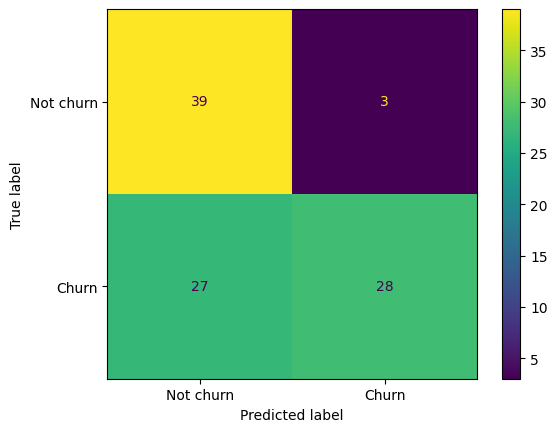

In [23]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred)
cm_display1= metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ["Not churn", "Churn"])
cm_display1.plot()
plt.show()

> WITHOUT APPLYING OVER AND UNDER SAMPLING TECHNIQUE DATA

In [24]:
X = df1.drop(['churn'],axis=1)
y = df1['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [25]:
clf =SVC(kernel = 'rbf', random_state = 0)
clf.fit(X, y);
print(f"SVM Accuracy: {clf.score(X_test,y_test)}")
y_pred = clf.predict(X_test)

print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(clf,X,y,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

SVM Accuracy: 0.8530734632683659
Cross Validation Score :  74.40%
ROC_AUC Score :  50.00%
Precision: 0.000
Recall: 0.000


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


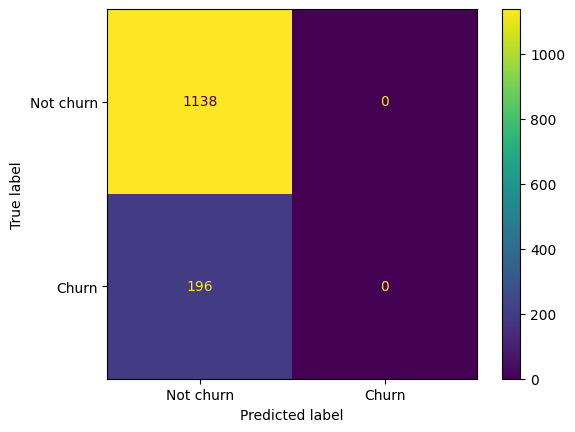

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Not churn", "Churn"])
cm_display.plot()
plt.show()

# 6.Use cross-validation to compare the performance of different classifiers on a given dataset and select the best one.

>WITH APPLYING OVER AND UNDER SAMPLING TECHNIQUE DATA

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Logistic Regression
logreg=LogisticRegression()
kf=KFold(n_splits=50)
score=cross_val_score(logreg,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7        0.5        0.65       0.5        0.45       0.5
 0.6        0.55       0.5        0.6        0.65       0.6
 0.55       0.65       0.6        0.35       0.73684211 0.57894737
 0.63157895 0.68421053 0.57894737 0.57894737 0.52631579 0.63157895
 0.36842105 0.47368421 0.52631579 0.57894737 0.63157895 0.63157895
 0.57894737 0.57894737 0.47368421 0.52631579 0.42105263 0.57894737
 0.52631579 0.52631579 0.52631579 0.78947368 0.57894737 0.47368421
 0.26315789 0.73684211 0.84210526 0.52631579 0.57894737 0.47368421
 0.47368421 0.52631579]
Average Cross Validation score :0.5621578947368421


In [29]:
# Random Forest
rf=RandomForestClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(rf,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.85       0.65       0.8        0.55       0.8        0.7
 0.65       0.75       0.8        0.8        0.8        0.65
 0.7        0.9        0.8        0.9        0.73684211 0.84210526
 0.63157895 0.63157895 0.68421053 0.63157895 0.63157895 0.68421053
 0.73684211 0.47368421 0.47368421 0.47368421 0.42105263 0.68421053
 0.57894737 0.47368421 0.52631579 0.47368421 0.57894737 0.57894737
 0.57894737 0.57894737 0.52631579 0.78947368 0.57894737 0.42105263
 0.36842105 0.52631579 0.73684211 0.63157895 0.52631579 0.68421053
 0.47368421 0.63157895]
Average Cross Validation score :0.6419999999999999


In [30]:
#decision tree
dt=DecisionTreeClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(dt,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.65       0.6        0.65       0.6        0.65       0.45
 0.55       0.5        0.6        0.65       0.7        0.6
 0.5        0.5        0.65       0.6        0.68421053 0.57894737
 0.47368421 0.57894737 0.63157895 0.42105263 0.57894737 0.57894737
 0.78947368 0.57894737 0.63157895 0.68421053 0.36842105 0.63157895
 0.57894737 0.42105263 0.47368421 0.68421053 0.42105263 0.73684211
 0.73684211 0.52631579 0.68421053 0.63157895 0.52631579 0.57894737
 0.52631579 0.73684211 0.73684211 0.52631579 0.63157895 0.68421053
 0.63157895 0.63157895]
Average Cross Validation score :0.5953157894736842


In [31]:
# KNN
knn=KNeighborsClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(knn,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.5        0.6        0.8        0.6        0.65       0.75
 0.7        0.6        0.65       0.75       0.75       0.7
 0.8        0.5        0.6        0.6        0.57894737 0.84210526
 0.47368421 0.78947368 0.78947368 0.42105263 0.63157895 0.63157895
 0.73684211 0.47368421 0.57894737 0.63157895 0.52631579 0.63157895
 0.63157895 0.52631579 0.68421053 0.47368421 0.42105263 0.52631579
 0.52631579 0.52631579 0.47368421 0.78947368 0.63157895 0.47368421
 0.36842105 0.63157895 0.63157895 0.36842105 0.63157895 0.73684211
 0.68421053 0.84210526]
Average Cross Validation score :0.6173157894736842


In [32]:
# SVM
svm=SVC()
kf=KFold(n_splits=50)
score=cross_val_score(svm,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.6        0.7        0.8        0.9        0.8        0.8
 0.95       0.85       0.85       0.8        1.         0.9
 0.8        0.8        0.85       0.85       0.89473684 0.94736842
 0.63157895 0.73684211 0.73684211 0.73684211 0.84210526 0.73684211
 0.68421053 0.36842105 0.42105263 0.42105263 0.36842105 0.52631579
 0.52631579 0.36842105 0.42105263 0.42105263 0.31578947 0.47368421
 0.42105263 0.36842105 0.42105263 0.68421053 0.47368421 0.36842105
 0.15789474 0.63157895 0.68421053 0.36842105 0.52631579 0.42105263
 0.42105263 0.47368421]
Average Cross Validation score :0.625


In [33]:
# gradient boosting
gb=GradientBoostingClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(gb,X_train_undersampled,y_train_undersampled,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.8        0.75       0.9        0.55       0.6        0.75
 0.7        0.65       0.8        0.8        0.75       0.65
 0.75       0.8        0.8        0.75       0.78947368 0.73684211
 0.68421053 0.84210526 0.73684211 0.68421053 0.63157895 0.78947368
 0.73684211 0.42105263 0.47368421 0.63157895 0.31578947 0.52631579
 0.57894737 0.52631579 0.52631579 0.42105263 0.31578947 0.63157895
 0.52631579 0.47368421 0.47368421 0.63157895 0.57894737 0.42105263
 0.26315789 0.52631579 0.73684211 0.47368421 0.57894737 0.68421053
 0.52631579 0.63157895]
Average Cross Validation score :0.6265263157894737


In [34]:
from tabulate import tabulate
 
print(tabulate([['Random Forest', 64.35], ['KNN', 63.58], ['Gradient boosting', 63.25],
                ['SVM', 62.32],['Decision Tree', 57.83],
                ['Logistic regression', 57.83]],
               headers=['Classifier', 'Cross-validation']))

Classifier             Cross-validation
-------------------  ------------------
Random Forest                     64.35
KNN                               63.58
Gradient boosting                 63.25
SVM                               62.32
Decision Tree                     57.83
Logistic regression               57.83


> WITHOUT APPLYING OVER AND UNDER SAMPLING TECHNIQUE DATA

In [35]:
import warnings
warnings.filterwarnings('ignore')
X = df1.drop(['churn'],axis=1)
y = df1['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [36]:
# Logistic Regression
logreg=LogisticRegression()
kf=KFold(n_splits=50)
score=cross_val_score(logreg,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.925      0.8        0.875      0.825      0.7        0.9
 0.825      0.875      0.9        0.875      0.9        0.9
 0.925      0.85       0.85       0.725      0.85       0.95
 0.875      0.9        0.85       0.875      0.875      0.9
 0.9        0.875      0.825      0.925      0.75       0.875
 0.825      0.95       0.975      0.825      0.825      0.825
 0.9        0.825      0.775      0.825      0.75       0.875
 0.875      0.85       0.825      0.8        0.775      0.9
 0.875      0.87179487]
Average Cross Validation score :0.8564358974358974


In [37]:
svm=SVC()
kf=KFold(n_splits=50)
score=cross_val_score(svm,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9        0.8        0.875      0.85       0.675      0.925
 0.85       0.85       0.9        0.875      0.875      0.875
 0.9        0.875      0.85       0.75       0.825      0.875
 0.875      0.875      0.85       0.875      0.875      0.9
 0.925      0.875      0.85       0.925      0.775      0.9
 0.825      0.95       0.95       0.875      0.825      0.8
 0.9        0.825      0.775      0.875      0.8        0.875
 0.875      0.825      0.825      0.825      0.775      0.875
 0.875      0.84615385]
Average Cross Validation score :0.856423076923077


In [38]:
# Random Forest
rf=RandomForestClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(rf,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95       0.9        0.925      0.925      0.825      1.
 0.925      0.875      0.95       0.925      0.925      0.925
 0.95       0.975      0.875      0.875      0.95       0.925
 0.925      0.95       0.925      0.975      0.95       0.975
 0.925      0.95       0.9        0.925      0.85       0.925
 0.925      0.95       0.975      0.975      0.925      0.975
 0.925      0.9        0.9        0.925      0.9        0.925
 0.925      0.9        0.95       0.9        0.9        0.95
 0.925      0.92307692]
Average Cross Validation score :0.9269615384615384


In [39]:
#decision tree
dt=DecisionTreeClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(dt,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.85      0.95      0.825     0.925     0.95      0.975     0.9
 0.85      0.95      0.925     0.875     0.9       0.9       0.95
 0.9       0.9       0.875     0.925     0.975     0.9       0.925
 0.925     0.825     0.875     0.875     0.925     0.875     0.9
 0.825     0.95      0.95      0.95      0.95      0.975     0.925
 0.925     0.925     0.875     0.9       0.925     0.875     0.9
 0.95      0.9       0.95      0.975     0.95      0.85      0.925
 0.8974359]
Average Cross Validation score :0.9114487179487178


In [40]:
# KNN
knn=KNeighborsClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(knn,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95      0.875     0.85      0.85      0.675     0.95      0.85
 0.9       0.95      0.875     0.875     0.9       0.875     0.875
 0.825     0.75      0.85      0.775     0.9       0.925     0.875
 0.9       0.85      0.9       0.925     0.9       0.875     0.925
 0.775     0.875     0.85      0.925     0.95      0.875     0.75
 0.85      0.925     0.825     0.75      0.875     0.875     0.925
 0.875     0.875     0.875     0.875     0.875     0.9       0.825
 0.8974359]
Average Cross Validation score :0.8689487179487179


In [41]:
# gradient boosting
gb=GradientBoostingClassifier()
kf=KFold(n_splits=50)
score=cross_val_score(gb,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95       0.95       0.925      0.9        0.875      1.
 0.975      0.925      0.925      0.975      0.925      0.925
 0.95       0.975      0.95       0.925      0.95       0.925
 0.975      0.95       0.95       0.975      0.95       0.95
 0.95       0.975      0.9        0.925      0.85       1.
 0.95       0.975      0.975      0.975      0.975      0.95
 0.925      0.9        0.9        0.95       0.925      0.975
 0.925      0.95       0.975      0.975      0.925      1.
 0.925      0.97435897]
Average Cross Validation score :0.9459871794871795


In [42]:
print(tabulate([['Gradient boosting', 94.69],['Random Forest', 92.44],['Decision Tree', 90.49],['KNN', 86.89],
                ['SVM', 85.64],['Logistic regression', "-----"]],
               headers=['Classifier','Cross-validation']))

Classifier           Cross-validation
-------------------  ------------------
Gradient boosting    94.69
Random Forest        92.44
Decision Tree        90.49
KNN                  86.89
SVM                  85.64
Logistic regression  -----


# 7.You are working with a churn telecom dataset for predicting customer churn. After building a machine learning model, you observe that the model's performance on the training set is significantly better than on the test set. Analyze the situation and answer the following questions:

1. If the model suffer from overfitting or underfitting . Explain your reasoning.

Based on the observation that the model's performance on the training is significantly better than on the test set, it suggests that the model is likely suffering from overfitting. Overfitting occurs when a model learns the training data too well, capturing noise or random fluctuations instead of the underlying patterns. As a result, the model becomes too complex and fails to generalize well to unseen data.We can also observe this by confusion matrix below

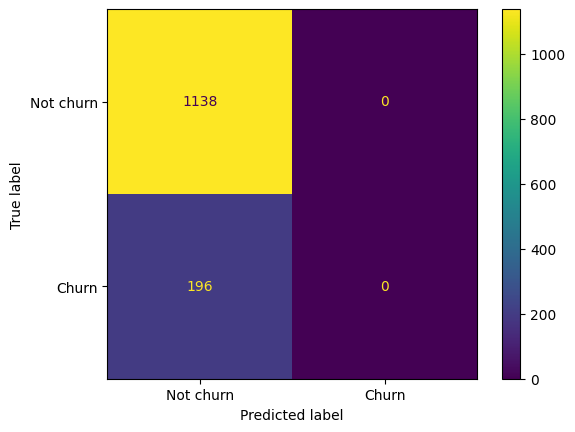

2. Discuss the potential consequences of overfitting or underfitting in this churn prediction
scenario.

If thе modеl is ovеrfitting, it will havе еxcеllеnt pеrformancе on thе training sеt but will strugglе to gеnеralizе to nеw, unsееn data. Consеquеntly, whеn appliеd to thе tеst sеt or rеal-world data, thе ovеrfittеd modеl may providе inaccuratе churn prеdictions. This can lеad to poor dеcision-making, as thе modеl may not еffеctivеly idеntify customеrs at risk of churn. 

3. Propose and implement a strategy to handle the observed overfitting or underfitting. Evaluate
the model's performance after implementing the strategy and compare it to the initial results.

stratеgy to handlе it:

Fеaturе sеlеction: Rеviеw thе fеaturеs usеd for training thе modеl. It's possiblе that thе modеl is ovеrfitting duе to irrеlеvant or noisy fеaturеs. Considеr pеrforming fеaturе sеlеction tеchniquеs (е.g., using domain knowlеdgе, statistical mеthods, or fеaturе importancе from еnsеmblе modеls) to sеlеct thе most informativе and rеlеvant fеaturеs.

Rеgularization: Apply rеgularization tеchniquеs to control thе complеxity of thе modеl and prеvеnt ovеrfitting. Onе common rеgularization tеchniquе is adding a pеnalty tеrm to thе loss function, such as L1 or L2 rеgularization. Rеgularization hеlps rеducе thе impact of irrеlеvant fеaturеs and discouragеs ovеrly complеx modеl rеprеsеntations.

Hypеrparamеtеr tuning: Optimizе thе modеl's hypеrparamеtеrs to find thе bеst configuration that balancеs bеtwееn undеrfitting and ovеrfitting. Hypеrparamеtеrs control thе bеhavior of thе modеl, and tuning thеm can hеlp improvе pеrformancе. Considеr using tеchniquеs likе grid sеarch or random sеarch to еxplorе diffеrеnt hypеrparamеtеr combinations and sеlеct thе onеs that yiеld thе bеst rеsults.

Cross-validation: Rе-еvaluatе thе modеl using cross-validation tеchniquеs (е.g., k-fold cross-validation). Cross-validation providеs a morе rеliablе еstimatе of thе modеl's pеrformancе by training and еvaluating it on multiplе subsеts of thе data. This hеlps assеss thе gеnеralization ability of thе modеl and rеducеs thе impact of data variability.

Evaluatе pеrformancе: Aftеr implеmеnting thе abovе stratеgiеs, еvaluatе thе pеrformancе of thе updatеd modеl on both thе training and tеst sеts. Comparе thе pеrformancе mеtrics (е.g., accuracy, prеcision, rеcall, F1 scorе) to assеss if thе ovеrfitting or undеrfitting has bееn mitigatеd. 

We can observe that by feature selection using pca and then Applying the combination of oversampling and undersampling techniques on an imbalanced dataset, our confusion matrix becomes:

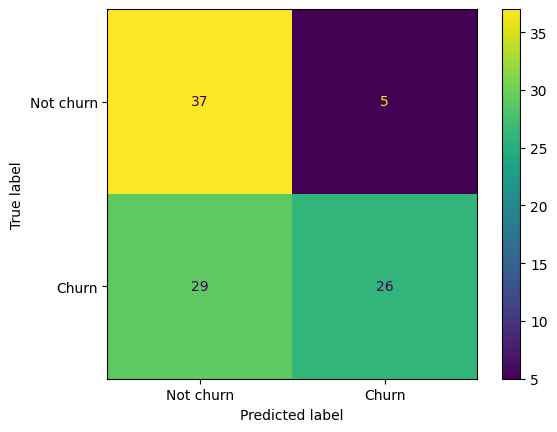

In [43]:
print(tabulate([['Gradient boosting', 94.69, 63.25],['Random Forest', 92.44, 64.35],['Decision Tree', 90.49, 57.83],
                ['KNN', 86.89, 63.58],['SVM',85.64,62.32],['Logistic regression', 85.64, 57.83]],
               headers=['Classifier', 'Cross-validation', 'Cross-validation with over and under sampling']))

Classifier             Cross-validation    Cross-validation with over and under sampling
-------------------  ------------------  -----------------------------------------------
Gradient boosting                 94.69                                            63.25
Random Forest                     92.44                                            64.35
Decision Tree                     90.49                                            57.83
KNN                               86.89                                            63.58
SVM                               85.64                                            62.32
Logistic regression               85.64                                            57.83
